In [ ]:
import pandas as pd
import plotly.express as px

# Load the data
octemp = pd.read_csv('/content/ohc_levitus_climdash_seasonal.csv')

# Convert 'Year' to datetime (assuming the data has only Year and not full DateTime)
octemp['Year'] = pd.to_datetime(octemp['Year'], format='%Y')

# Create an enhanced line plot
fig = px.line(octemp,
              x='Year',
              y='heat content anomaly (10^22  Joules)',
              color_discrete_sequence=['red'],  # Keep the red color
              markers=True,
              title='Ocean Heat Content Anomalies Over Time',
              labels={
                  'heat content anomaly (10^22  Joules)': 'Heat Content Anomaly (x10^22 Joules)',
                  'Year': 'Year'
              }
)

# Update layout for better interaction and aesthetics
fig.update_layout(
    xaxis_title="Year",
    yaxis_title="Heat Content Anomaly (x10^22 Joules)",
    title_x=0.5,  # Center the title
    template="plotly_white",  # Clean layout
    font=dict(size=14),
    xaxis=dict(
        rangeslider=dict(visible=True),  # Add a range slider for easier navigation
        showgrid=True
    ),
    yaxis=dict(
        showgrid=True
    )
)

# Add hover information for more details
fig.update_traces(
    hovertemplate='<b>Year</b>: %{x}<br><b>Heat Content Anomaly</b>: %{y} x10^22 Joules'
)

# Show the enhanced plot
fig.show()


In [ ]:
# First, you need to load the data in Python
import pandas as pd

# Load the data in Python
octemp = pd.read_csv('/content/ohc_levitus_climdash_seasonal.csv')

# Convert DataFrame to JSON format to pass it to JavaScript
data_json = octemp[['Year', 'heat content anomaly (10^22  Joules)']].to_dict(orient='list')

# Now pass the JSON data to HTML/JavaScript code
from IPython.display import display, HTML

html_code = f"""
%%html
<div id="plot"></div>
<script src="https://cdn.plot.ly/plotly-latest.min.js"></script>

<script>
// Get the data from Python
var data = {data_json};

// Extract year and anomaly arrays
var years = data['Year'];
var heatContent = data['heat content anomaly (10^22  Joules)'];

// Create the trace for the line chart
var trace = {{
    x: years,
    y: heatContent,
    mode: 'lines+markers',
    marker: {{
        color: 'red'
    }},
    line: {{
        shape: 'linear'
    }},
    name: 'Heat Content Anomaly'
}};

// Layout options for better readability
var layout = {{
    title: 'Ocean Heat Content Anomalies Over Time',
    xaxis: {{
        title: 'Year',
        rangeslider: {{ visible: true }}
    }},
    yaxis: {{
        title: 'Heat Content Anomaly (x10^22 Joules)'
    }},
    hovermode: 'x',
    template: 'plotly_white'
}};

// Render the plot in the 'plot' div
Plotly.newPlot('plot', [trace], layout);
</script>
"""

# Display the HTML code in Colab
display(HTML(html_code))


In [ ]:
octemp.head()


,Year,month,heat content anomaly (10^22 Joules)
0,1955,6,-0.112888
1,1956,6,-4.435912
2,1957,6,-5.581200
3,1958,6,-1.357916
4,1959,6,-0.125907


In [ ]:
octemp.drop(['month'], axis=1, inplace=True)

In [ ]:
octemp.describe()

,Year,heat content anomaly (10^22 Joules)
count,69.000000,69.000000
mean,1989.000000,3.745472
std,20.062403,7.091536
min,1955.000000,-5.943489
25%,1972.000000,-1.675871
50%,1989.000000,1.703140
75%,2006.000000,9.614333
max,2023.000000,20.062943


In [ ]:
# Extract the 'Year' and 'heat content anomaly' columns as strings
year_str = octemp['Year'].astype(str).tolist()  # Convert 'Year' from int to string
anomaly_str = octemp['heat content anomaly (10^22  Joules)'].astype(str).tolist()  # Convert anomaly values to string


In [ ]:
print(year_str)
print(anomaly_str)


['1955', '1956', '1957', '1958', '1959', '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023']
['-0.112888', '-4.435912', '-5.5812', '-1.357916', '-0.125907', '-1.15004', '-2.191756', '-3.028738', '-1.974558', '-0.999268', '-3.65106', '-3.879088', '-3.258875', '-4.560177', '-4.898119', '-5.943489', '-3.910183', '-2.54613', '-3.276274', '-3.247772', '-2.137013', '-0.842684', '1.487195', '0.186941', '-1.640448', '1.813644', '0.533019', '-1.675871', '2.378227', '-2.455978', '1.808964', '1.70314', '-1.371921', '0.316734', '2.184499', '-1.21

In [ ]:
co2_df=pd.read_csv('/content/co2_mm_mlo.csv')

In [ ]:
pip install pandas plotly


In [ ]:
import pandas as pd
import plotly.graph_objects as go

# Load the data from the CSV file
# Replace the path with the actual location of your CSV file
data = pd.read_csv('/content/co2_mm_mlo.csv')

# Preview the data (optional, helps to inspect the data)
print(data.head())

# Assuming the CSV has columns like: Year, Month, Decimal Date, Average CO2, Decentralized CO2, Standard Deviation
# Convert Year and Month into a proper date for plotting
data['Date'] = pd.to_datetime(data['year'].astype(str) + '-' + data['month'].astype(str) )

# Create the main line plot for Average CO2
fig = go.Figure()

# Plot average CO2 with error bars (standard deviation)
fig.add_trace(go.Scatter(
    x=data['Date'],
    y=data['average'],
    mode='lines+markers',
    name='Average CO2',
    line=dict(color='blue'),
    error_y=dict(
        type='data',
        array=data['sdev'],  # Use standard deviation as error bars
        visible=True
    ),
    hovertemplate='<b>Date</b>: %{x}<br><b>CO2 Average</b>: %{y} ppm<extra></extra>'
))

# Add decentralized CO2 for comparison
fig.add_trace(go.Scatter(
    x=data['Date'],
    y=data['deseasonalized'],  # Changed to Deseasonalized CO2
    mode='lines+markers',
    name='Deseasonalized CO2',
    line=dict(color='green', dash='dash'),  # Dashed line to show it's a trend
    hovertemplate='<b>Date</b>: %{x}<br><b>CO2 Deseasonalized</b>: %{y} ppm<extra></extra>'
))


# Add monthly trend - Use the month to add color variation for better visibility
fig.add_trace(go.Scatter(
    x=data['Date'],
    y=data['average'],
    mode='markers',
    name='Monthly Trend',
    marker=dict(size=10, color=data['month'], colorscale='Viridis', showscale=True),
    hovertemplate='<b>Year-Month</b>: %{x|%Y-%m}<br><b>CO2</b>: %{y} ppm<extra></extra>'
))

# Update layout for better readability and interactivity
fig.update_layout(
    title='CO2 Levels Over Time with Monthly Trends',
    xaxis_title='Year',
    yaxis_title='CO2 Average (ppm)',
    template='plotly_white',
    hovermode='x',
    xaxis=dict(rangeslider=dict(visible=True)),
)

# Show the plot
fig.show()


   year  month  decimal date  average  deseasonalized  ndays  sdev   unc
0  1958      3     1958.2027   315.70          314.43     -1 -9.99 -0.99
1  1958      4     1958.2877   317.45          315.16     -1 -9.99 -0.99
2  1958      5     1958.3699   317.51          314.71     -1 -9.99 -0.99
3  1958      6     1958.4548   317.24          315.14     -1 -9.99 -0.99
4  1958      7     1958.5370   315.86          315.18     -1 -9.99 -0.99


In [ ]:
import pandas as pd
import plotly.graph_objects as go

# Load the sea level rise data from the CSV file
data = pd.read_csv('/content/Global_sea_level_rise.csv')

# Convert 'year' into a proper 'Date' column for plotting
data['Date'] = pd.to_datetime(data['year'].astype(str))

# Step 1: Calculate the starting year (lowest sea level rise)
start_year_row = data.loc[data['mmfrom1993-2008average'].idxmin()]
start_year = start_year_row['year']
start_mm = start_year_row['mmfrom1993-2008average']

# Step 2: Calculate the Simple Moving Average (SMA) for a specified window (e.g., 5 years)
window_size = 5  # You can adjust the window size
data['SMA'] = data['mmfrom1993-2008average'].rolling(window=window_size).mean()

# Identify the rising concern year based on SMA
rising_concern_row = data.loc[data['SMA'].idxmax()]
rising_concern_year = rising_concern_row['year']
rising_concern_mm = rising_concern_row['SMA']

# Step 3: Calculate heightened awareness (above a threshold - 90th percentile)
threshold_value = data['mmfrom1993-2008average'].quantile(0.90)
heightened_awareness_row = data.loc[data['mmfrom1993-2008average'] >= threshold_value].iloc[0]
heightened_awareness_year = heightened_awareness_row['year']
heightened_awareness_mm = heightened_awareness_row['mmfrom1993-2008average']

# Plot the sea level rise data
fig = go.Figure()

# Main line plot for average sea level rise
fig.add_trace(go.Scatter(
    x=data['year'],
    y=data['mmfrom1993-2008average'],
    mode='lines+markers',
    name='Average Sea Level Rise',
    line=dict(color='royalblue', width=2),
    marker=dict(size=5, color='royalblue', symbol='circle'),
    hovertemplate='<b>Date</b>: %{x|%Y}<br><b>Sea Level Rise</b>: %{y} mm<extra></extra>'
))

# Add the SMA line to the plot
fig.add_trace(go.Scatter(
    x=data['year'],
    y=data['SMA'],
    mode='lines',
    name='Simple Moving Average',
    line=dict(color='orange', width=2, dash='dash'),
    hovertemplate='<b>Date</b>: %{x|%Y}<br><b>SMA Sea Level Rise</b>: %{y:.2f} mm<extra></extra>'
))

# Step 4: Annotate the plot with the key events

# Start Year Annotation
fig.add_annotation(
    x=pd.to_datetime(f'{start_year}-01-01'),
    y=start_mm,
    text=f'Start Year ({start_year})',
    showarrow=True,
    arrowhead=2,
    ax=0,
    ay=-40,
    font=dict(color='green', size=12),
    bgcolor='rgba(255, 255, 255, 0.7)',
    bordercolor='gray',
    borderwidth=1,
    borderpad=5
)

# Rising Concern Annotation
fig.add_annotation(
    x=pd.to_datetime(f'{rising_concern_year}-01-01'),
    y=rising_concern_mm,
    text=f'Rising Concern (SMA) ({rising_concern_year})',
    showarrow=True,
    arrowhead=2,
    ax=0,
    ay=-40,
    font=dict(color='red', size=12),
    bgcolor='rgba(255, 255, 255, 0.7)',
    bordercolor='gray',
    borderwidth=1,
    borderpad=5
)

# Heightened Awareness Annotation
fig.add_annotation(
    x=pd.to_datetime(f'{heightened_awareness_year}-01-01'),
    y=heightened_awareness_mm,
    text=f'Heightened Awareness ({heightened_awareness_year})',
    showarrow=True,
    arrowhead=2,
    ax=0,
    ay=-40,
    font=dict(color='orange', size=12),
    bgcolor='rgba(255, 255, 255, 0.7)',
    bordercolor='gray',
    borderwidth=1,
    borderpad=5
)

# Update layout for better readability and aesthetics
fig.update_layout(
    title='Global Sea Level Rise Over Time with Key Events',
    xaxis_title='Year',
    yaxis_title='Average Sea Level Rise (mm)',
    template='plotly_white',
    hovermode='x unified',  # Unified hover information
    showlegend=True,
    legend=dict(x=0, y=1.1, orientation='h', bgcolor='rgba(255, 255, 255, 0)', bordercolor='Black', borderwidth=1),
    margin=dict(l=40, r=40, t=60, b=40),  # Adjust margins for better fit
    xaxis=dict(
        title_font=dict(size=14),
        tickfont=dict(size=12),
        showgrid=True,
        zeroline=True,
        zerolinewidth=2,
        zerolinecolor='gray'
    ),
    yaxis=dict(
        title_font=dict(size=14),
        tickfont=dict(size=12),
        showgrid=True,
        zeroline=True,
        zerolinewidth=2,
        zerolinecolor='gray'
    )
)

# Show the plot
fig.show()

# Print key events for reference
print(f'Start Year: {start_year} with {start_mm} mm rise')
print(f'Rising Concern Year: {rising_concern_year} with {rising_concern_mm:.2f} mm rise (based on SMA)')
print(f'Heightened Awareness Year: {heightened_awareness_year} with {heightened_awareness_mm} mm rise (Threshold: {threshold_value} mm)')


Start Year: 1882 with -190.0807292 mm rise
Rising Concern Year: 2022 with 62.83 mm rise (based on SMA)
Heightened Awareness Year: 2008 with 30.45260417 mm rise (Threshold: 28.919270835999978 mm)


In [ ]:
import pandas as pd
import plotly.graph_objects as go

# Load the methane data from the CSV file
data = pd.read_csv('/content/Global_monthly_mean_ch4.csv')

# Assuming the CSV has columns named 'year' and 'average_methane'
# Example data:
# year,average_methane
# 2000,1750
# 2001,1760

# Create a new column for Month from a decimal date (if applicable)
# Assuming you have a column 'decimal_date'
# Example: 2024.75 means 75% into the year 2024, which is around October
if 'decimal_date' in data.columns:
    data['month'] = (data['decimal_date'] - data['decimal_date'].astype(int)) * 12
    data['month'] = data['month'].round().astype(int)  # Round and convert to integer

# Plot the methane data
fig = go.Figure()

# Main line plot for average methane
fig.add_trace(go.Scatter(
    x=data['year'],
    y=data['average'],
    mode='lines+markers',
    name='Average Methane Concentration',
    line=dict(color='green', width=2),
    marker=dict(size=5, color='green', symbol='circle'),
    hovertemplate='<b>Year</b>: %{x}<br><b>Methane Concentration</b>: %{y} ppb<extra></extra>'
))

# Update layout for better readability and aesthetics
fig.update_layout(
    title='Average Methane Concentration Over Years',
    xaxis_title='Year',
    yaxis_title='Methane Concentration (ppb)',
    template='plotly_white',
    hovermode='x unified',  # Unified hover information
    showlegend=True,
    margin=dict(l=40, r=40, t=60, b=40),  # Adjust margins for better fit
    xaxis=dict(
        title_font=dict(size=14),
        tickfont=dict(size=12),
        showgrid=True,
        zeroline=True,
        zerolinewidth=2,
        zerolinecolor='gray'
    ),
    yaxis=dict(
        title_font=dict(size=14),
        tickfont=dict(size=12),
        showgrid=True,
        zeroline=True,
        zerolinewidth=2,
        zerolinecolor='gray'
    )
)

# Show the plot
fig.show()

# Print the month extracted if available
if 'month' in data.columns:
    print("Extracted Months:")
    print(data[['year', 'month']])


Extracted Months:
     year  month
0    1983      7
1    1983      8
2    1983      9
3    1983     10
4    1983     11
..    ...    ...
478  2023      5
479  2023      6
480  2023      7
481  2023      8
482  2023      9

[483 rows x 2 columns]


In [ ]:
# Load the temperature data from the CSV file
data = pd.read_csv('/content/Global_annual_mean_temp.csv')

# Assuming the CSV has columns: 'year', 'no_smoothing', and 'lowess'
# Example data:
# year,no_smoothing,lowess
# 1880,-0.2,-0.1
# 1881,-0.1,-0.05

# Plot the global temperature data
fig = go.Figure()

# Line plot for "no smoothing" data (raw global temperatures)
fig.add_trace(go.Scatter(
    x=data['Year'],
    y=data['No_Smoothing'],
    mode='lines+markers',
    name='No Smoothing (Raw Data)',
    line=dict(color='blue', width=2),
    marker=dict(size=5, color='blue', symbol='circle'),
    hovertemplate='<b>Year</b>: %{x}<br><b>No Smoothing Temp</b>: %{y}°C<extra></extra>'
))

# Line plot for "lowess" (smoothed trend)
fig.add_trace(go.Scatter(
    x=data['Year'],
    y=data['Lowess(5)'],
    mode='lines+markers',
    name='LOWESS (Smoothed Trend)',
    line=dict(color='red', width=2),
    marker=dict(size=5, color='red', symbol='circle'),
    hovertemplate='<b>Year</b>: %{x}<br><b>Smoothed Temp</b>: %{y}°C<extra></extra>'
))

# Update layout for better readability and aesthetics
fig.update_layout(
    title='Global Average Temperature Over Time (No Smoothing vs LOWESS)',
    xaxis_title='Year',
    yaxis_title='Temperature Anomaly (°C)',
    template='plotly_white',
    hovermode='x unified',  # Unified hover information
    showlegend=True,
    legend=dict(x=0, y=1.1, orientation='h', bgcolor='rgba(255, 255, 255, 0)', bordercolor='Black', borderwidth=1),
    margin=dict(l=40, r=40, t=60, b=40),  # Adjust margins for better fit
    xaxis=dict(
        title_font=dict(size=14),
        tickfont=dict(size=12),
        showgrid=True,
        zeroline=True,
        zerolinewidth=2,
        zerolinecolor='gray'
    ),
    yaxis=dict(
        title_font=dict(size=14),
        tickfont=dict(size=12),
        showgrid=True,
        zeroline=True,
        zerolinewidth=2,
        zerolinecolor='gray'
    )
)

# Show the plot
fig.show()

# Print a summary for key events (optional)
print("Temperature data summary:")
print(data[['Year', 'No_Smoothing', 'Lowess(5)']].describe())


Temperature data summary:
              Year  No_Smoothing   Lowess(5)
count   144.000000    144.000000  144.000000
mean   1951.500000      0.067500    0.066528
std      41.713307      0.378167    0.364276
min    1880.000000     -0.480000   -0.410000
25%    1915.750000     -0.200000   -0.222500
50%    1951.500000     -0.045000   -0.035000
75%    1987.250000      0.280000    0.280000
max    2023.000000      1.170000    1.010000


In [ ]:
# Load the ice extent data from the CSV file
data = pd.read_csv('/content/arctic_ice_extent.csv')
# Plot the ice extent data
fig = go.Figure()

# Line plot for "Ice Extent" data
fig.add_trace(go.Scatter(
    x=data['year'],
    y=data['extent'],
    mode='lines+markers',
    name='Ice Extent (Million km²)',
    line=dict(color='deepskyblue', width=2),
    marker=dict(size=5, color='deepskyblue', symbol='circle'),
    hovertemplate='<b>Year</b>: %{x}<br><b>Ice Extent</b>: %{y} million km²<extra></extra>'
))

# Update layout for better readability and aesthetics
fig.update_layout(
    title='Arctic Sea Ice Extent Over Time',
    xaxis_title='Year',
    yaxis_title='Sea Ice Extent (Million km²)',
    template='plotly_white',
    hovermode='x unified',  # Unified hover information
    showlegend=True,
    legend=dict(x=0, y=1.1, orientation='h', bgcolor='rgba(255, 255, 255, 0)', bordercolor='Black', borderwidth=1),
    margin=dict(l=40, r=40, t=60, b=40),  # Adjust margins for better fit
    xaxis=dict(
        title_font=dict(size=14),
        tickfont=dict(size=12),
        showgrid=True,
        zeroline=True,
        zerolinewidth=2,
        zerolinecolor='gray'
    ),
    yaxis=dict(
        title_font=dict(size=14),
        tickfont=dict(size=12),
        showgrid=True,
        zeroline=True,
        zerolinewidth=2,
        zerolinecolor='gray'
    )
)

# Show the plot
fig.show()

# Print a summary for reference (optional)
print("Ice extent data summary:")
print(data[['year', 'extent']].describe())


Ice extent data summary:
              year     extent
count    45.000000  45.000000
mean   2001.000000   5.745422
std      13.133926   1.141160
min    1979.000000   3.387000
25%    1990.000000   4.665000
50%    2001.000000   5.978000
75%    2012.000000   6.903000
max    2023.000000   7.544000


In [ ]:
import pandas as pd
import plotly.graph_objects as go

# Load the mass measurement data from the CSV file
data = pd.read_csv('/content/Antartica_mass.csv')

# Assuming your CSV has the columns: 'year', 'Antarctic mass', 'Antarctic mass 1-sigma uncertainty'
# Example data:
# year,Antarctic mass,Antarctic mass 1-sigma uncertainty
# 2000,-100,20
# 2001,-105,18

# Step 1: Calculate mass with Antarctic mass 1-sigma Antarctic mass 1-sigma uncertainty Amount bounds
data['mass_upper'] = data['Antarctic mass'] + data['Antarctic mass 1-sigma uncertainty']
data['mass_lower'] = data['Antarctic mass'] - data['Antarctic mass 1-sigma uncertainty']

# Step 2: Plot the mass measurement with Antarctic mass 1-sigma uncertainty
fig = go.Figure()

# Main line plot for mass measurements
fig.add_trace(go.Scatter(
    x=data['year'],
    y=data['Antarctic mass'],
    mode='lines+markers',
    name='Mass (Gigaton)',
    line=dict(color='blue', width=2),
    marker=dict(size=5, color='blue', symbol='circle'),
    hovertemplate='<b>Year</b>: %{x}<br><b>Mass</b>: %{y} GT<extra></extra>'
))

# Fill between mass_upper and mass_lower to show the Antarctic mass 1-sigma uncertainty range
fig.add_trace(go.Scatter(
    x=data['year'],
    y=data['mass_upper'],
    fill=None,
    mode='lines',
    line=dict(width=0, color='rgba(0,100,80,0.2)'),
    name='Upper Bound'
))

fig.add_trace(go.Scatter(
    x=data['year'],
    y=data['mass_lower'],
    fill='tonexty',  # fill area between upper and lower bounds
    mode='lines',
    line=dict(width=0, color='rgba(0,100,80,0.2)'),
    name='Lower Bound',
    hoverinfo='skip'  # Hide hoverinfo for the Antarctic mass 1-sigma uncertainty bounds
))

# Step 3: Update the layout for better aesthetics
fig.update_layout(
    title='Mass Measurement with Antarctic mass 1-sigma uncertainty (Gigaton)',
    xaxis_title='Year of Observation',
    yaxis_title='Mass (Gigaton)',
    template='plotly_white',
    hovermode='x unified',
    showlegend=True,
    legend=dict(x=0, y=1.1, orientation='h', bgcolor='rgba(255, 255, 255, 0)', bordercolor='Black', borderwidth=1),
    margin=dict(l=40, r=40, t=60, b=40),  # Adjust margins for better fit
    xaxis=dict(
        title_font=dict(size=14),
        tickfont=dict(size=12),
        showgrid=True,
        zeroline=True,
        zerolinewidth=2,
        zerolinecolor='gray'
    ),
    yaxis=dict(
        title_font=dict(size=14),
        tickfont=dict(size=12),
        showgrid=True,
        zeroline=True,
        zerolinewidth=2,
        zerolinecolor='gray'
    )
)

# Step 4: Show the plot
fig.show()

# Print the first few rows for reference
print(data.head())


      year  Antarctic mass  Antarctic mass 1-sigma uncertainty  mass_upper  \
0  2002.29            0.00                              178.90      178.90   
1  2002.35           23.70                              102.47      126.17   
2  2002.62          -51.67                               83.09       31.42   
3  2002.71           47.89                               97.19      145.08   
4  2002.79           72.21                               61.82      134.03   

   mass_lower  
0     -178.90  
1      -78.77  
2     -134.76  
3      -49.30  
4       10.39  


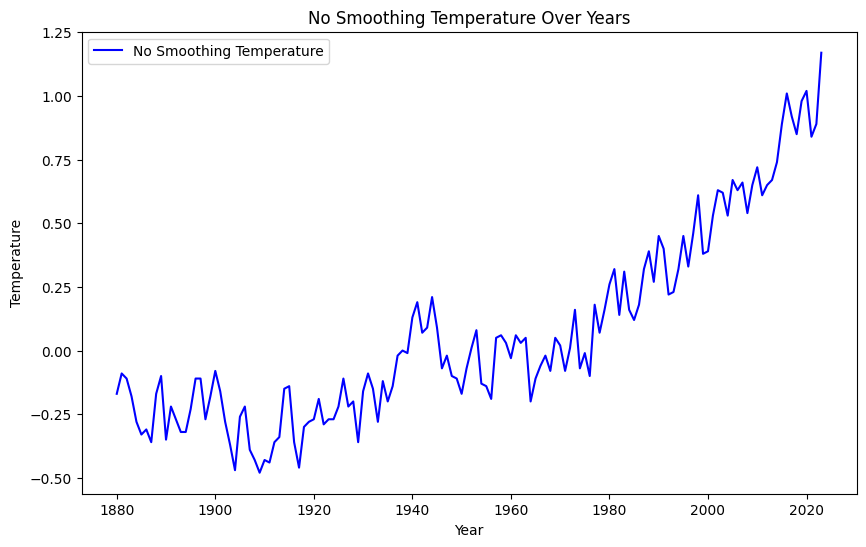

Mean Squared Error: 0.011245768098848103


In [8]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import xgboost as xgb
from sklearn.metrics import mean_squared_error

# Load the dataset
# Assuming the dataset has columns: 'Year', 'No_Smoothing', 'Lowess(5)'
df = pd.read_csv('/content/Global_annual_mean_temp.csv')

# # Plot the No Smoothing temperature data
# plt.figure(figsize=(10, 6))
# plt.plot(df['Year'], df['No_Smoothing'], label='No Smoothing Temperature', color='blue')
# plt.title('No Smoothing Temperature Over Years')
# plt.xlabel('Year')
# plt.ylabel('Temperature')
# plt.legend()
# plt.show()

# Extract features and target
# Using the 'No_Smoothing' and 'Lowess(5)' columns to predict future 'Lowess(5)' values
X = df['Year']
y = df['No_Smoothing']  # Shift Lowess(5) to predict future values

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data (optional, XGBoost can handle raw data but scaling improves performance)


# Initialize the XGBoost regressor
xgb_reg = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.05)

# Train the model
xgb_reg.fit(X_train, y_train)

# Make predictions
y_pred = xgb_reg.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Plot actual vs predicted temperature (No Smoothing vs Predicted Lowess(5))
#


In [9]:
# --------- Predict Future Years ---------
# Let's assume we want to predict the temperature for the next 10 years
future_years = np.array([year for year in range(2025, 2035)]).reshape(-1, 1)

# Predict future temperatures using the trained model
future_temperatures = xgb_reg.predict(future_years)

In [10]:
future_temperatures = xgb_reg.predict(future_years)

In [11]:
print(future_temperatures)

[1.0877545 1.0877545 1.0877545 1.0877545 1.0877545 1.0877545 1.0877545
 1.0877545 1.0877545 1.0877545]


   Year  No_Smoothing  Lowess(5)
0  1880         -0.17      -0.10
1  1881         -0.09      -0.13
2  1882         -0.11      -0.17
3  1883         -0.18      -0.20
4  1884         -0.28      -0.24


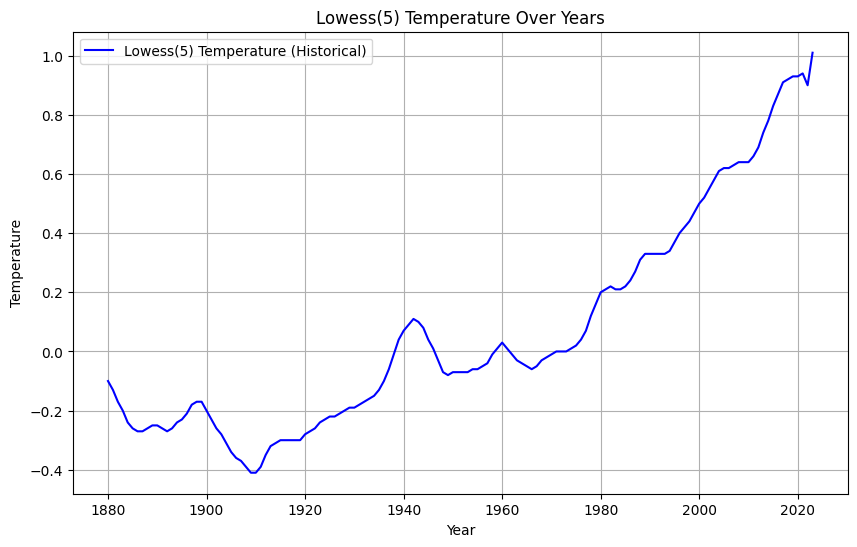

Shape of X: (144, 1), Shape of y: (144,)
Mean Squared Error: 0.0011653760244033317
Future Years: [2025 2026 2027 2028 2029 2030 2031 2032 2033 2034]
Predicted Future Temperatures: [0.9561766 0.9561766 0.9561766 0.9561766 0.9561766 0.9561766 0.9561766
 0.9561766 0.9561766 0.9561766]


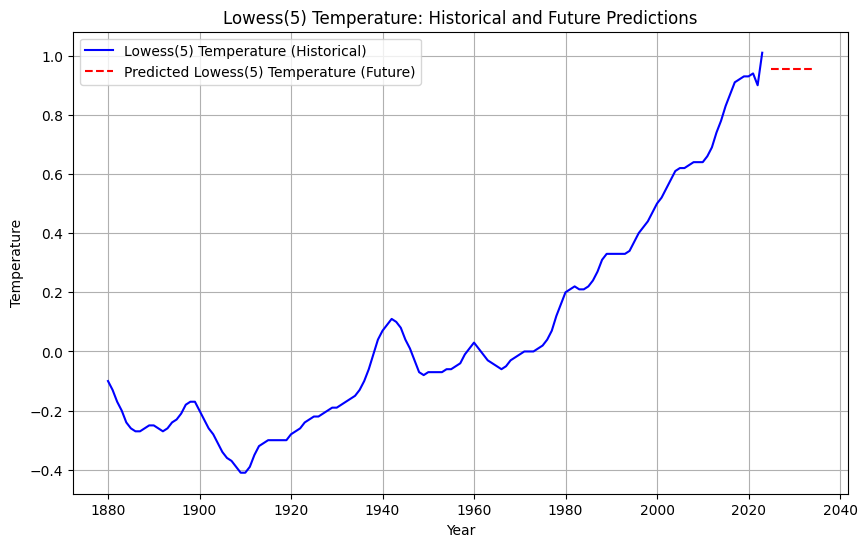

In [16]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb

# Load the dataset
# Assuming the dataset has columns: 'Year', 'No_Smoothing', 'Lowess(5)'
df = pd.read_csv('/content/Global_annual_mean_temp.csv')

# Debug: Check the data structure
print(df.head())

# Plot the historical Lowess(5) temperature trend
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Lowess(5)'], label='Lowess(5) Temperature (Historical)', color='blue')
plt.title('Lowess(5) Temperature Over Years')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.grid(True)
plt.legend()
plt.show()

# --------- Prediction using XGBoost ---------
# We will use 'Year' to predict 'Lowess(5)' values

# Extract features (Year) and target (Lowess(5))
X = df['Year'].values.reshape(-1, 1)  # Reshape for a single feature (Year)
y = df['Lowess(5)'].values

# Debug: Print the shape of X and y
print(f"Shape of X: {X.shape}, Shape of y: {y.shape}")

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost regressor
xgb_reg = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.05)

# Train the model on the training set
xgb_reg.fit(X_train, y_train)

# Make predictions for the test set
y_pred = xgb_reg.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# --------- Predict Future Temperature Values ---------
# Let's assume we want to predict the Lowess(5) values for the next 10 years
future_years = np.array([year for year in range(2025, 2035)]).reshape(-1, 1)

# Debug: Print future_years to check if it's correctly defined
print(f"Future Years: {future_years.flatten()}")

# Predict future Lowess(5) temperatures using the trained model
future_temperatures = xgb_reg.predict(future_years)

# Debug: Print future temperatures to verify the prediction
print(f"Predicted Future Temperatures: {future_temperatures}")

# Plot actual Lowess(5) temperature trend with future predictions
plt.figure(figsize=(10, 6))

# Plot historical data (Lowess(5) temperature)
plt.plot(df['Year'], df['Lowess(5)'], label='Lowess(5) Temperature (Historical)', color='blue')

# Plot future predicted Lowess(5) temperatures
plt.plot(future_years.flatten(), future_temperatures, label='Predicted Lowess(5) Temperature (Future)', color='red', linestyle='dashed')

plt.title('Lowess(5) Temperature: Historical and Future Predictions')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.legend()
plt.grid(True)
plt.show()
